In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-05-10 20:55:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 2607:f8b0:4004:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-10 20:55:33 (126 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences=True)))# An LSTM Layer
model.add(Dropout(0.25))# A dropout layer
model.add(Bidirectional(LSTM(100)))# Another LSTM Layer
model.add(Dense(total_words/2, activation='relu', kernel_regularizer= regularizers.l2(l=0.01)))# A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))# A Dense Layer
# Pick an optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')# Pick a loss function and an optimizer
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_1 (Dense)              (None, 1605)              322605    
_________________________________________________________________
dense_2 (Dense)              (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 7s 14ms/step - loss: 6.9789 - accuracy: 0.0213
Epoch 2/100
484/484 [==============================] - 7s 14ms/step - loss: 6.5132 - accuracy: 0.0243
Epoch 3/100
484/484 [==============================] - 7s 14ms/step - loss: 6.4124 - accuracy: 0.0261
Epoch 4/100
484/484 [==============================] - 7s 14ms/step - loss: 6.2889 - accuracy: 0.0348
Epoch 5/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1593 - accuracy: 0.0376
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 6.0367 - accuracy: 0.0415
Epoch 7/100
484/484 [==============================] - 7s 14ms/step - loss: 5.9211 - accuracy: 0.0452
Epoch 8/100
484/484 [==============================] - 7s 14ms/step - loss: 5.8055 - accuracy: 0.0493
Epoch 9/100
484/484 [==============================] - 7s 14ms/step - loss: 5.6901 - accuracy: 0.0567
Epoch 10/100
484/484 [==============================] - 7s 14ms/step - loss: 5.583

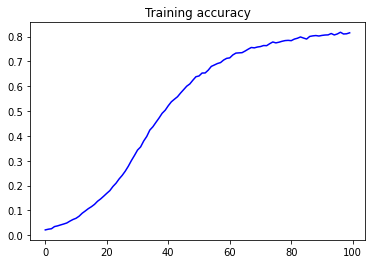

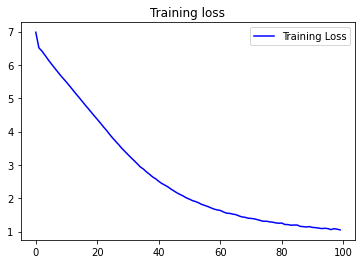

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thy possessing doth cross give appear twain ' ' shall grew no praises like him bereft achieve achieve dun burn'd quite winters right o'er date days or right memory stay days mute kind or lose dross dross appear appear young me young her delight bower hour shall delight crime crime young ' days quite hour alone seen so present spends her delight bower decease quite gone are new prove ill blind old old praise praise hold thee ' and hast old seen thence stay be stol'n it back are hence wantonly go lived alone most eyes nor best have far
